# Task 3

1. Provide a design strategy for the delivery of the required amount of water from the river to the filtration unit.
2. Evaluate the **velocity** of the water through both pipes for each of the selected *diameters*.
3. Evaluate the **pump** head and **power** required for the *average daily flow* and the *peak flow* including *major* and *minor losses* using the selected pair of *diameters*.
4. Plot the **hydraulic grade line (HGL)** and the **energy line (EL)** along the *length* of the pipe at the *13 locations* for the chosen set of *diameters*.
5. Choose **pump type**, evaluate the **number of pumps** needed, and calulate the **capital cost** of the pumps.
6. Calculate the **capital cost** and the **operating cost** for each pair of *diameters*, evaluate wich of the pairs is **optimum**.

In [1]:
import numpy as np
import fluids
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import g

Given Parameters


| Location | Distance (m) | Elevation (m) | Type of fittings | Material | Note |
|---|---|---|---|---|---|
|  0 |  0 | 630 | 2 Elbows, 1 Gate Valve | HDPE | Source
|  1 | 10 | 637 | 1 Reducer, 1 Expander | HDPE
|  2 | 13 | 638 | 4 Elbows | Carbon Steel
|  3 | 15 | 639 || Carbon Steel
|  4 | 19 | 640 | 4 Elbows | Carbon Steel
|  5 | 22 | 641 || Carbon Steel
|  6 | 26 | 642 | 2 Elbows | Carbon Steel
|  7 | 32 | 643 || Carbon Steel
|  8 | 35 | 644 || Carbon Steel
|  9 | 39 | 645 || Carbon Steel
| 10 | 42 | 646 | 4 Elbows | HDPE
| 11 | 45 | 650 | 1 Reducer | HDPE | WTP Entry
| 12 | 45 to 55 | 651 | 8 Elbows, 3 Gate Valves | HDPE | LF
| 13 | 55 to 67 | 657 | 8 Elbows, 2 Gate Valves | HDPE | MF

- Average daily flow rate : 60 L/s
- Peak  flow rate: 180 L/s
- LF pipe length: 10 m
- MF pipe length: 12 m

In [2]:
# Given Data in base SI units
K_L = {'Elbow': 0.39, 'Gate Valve': 0.1, 'Reducer': 0.51, 'Expander': 0.62}

# Surface roughness in m
epsilon = {'HDPE': 1.5e-06, 'Carbon Steel': 1.5e-04}

# Information about pipeline
pipeline = pd.DataFrame(
    {
        'Distance (m)': np.array([0, 10, 13, 15, 19, 22, 26, 32, 35, 39, 42, 45, 55, 67]),
        'Elevation (m)': np.array([630, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 650, 651, 658]),
        'Sum of Loss Coefficients': np.array([
            2*K_L['Elbow']+K_L['Gate Valve'], 
            K_L['Reducer']+K_L['Expander'],
            4*K_L['Elbow'],
            0,
            4*K_L['Elbow'],
            0,
            2*K_L['Elbow'],
            0,
            0,
            0,
            4*K_L['Elbow'],
            K_L['Reducer'],
            8*K_L['Elbow']+3*K_L['Gate Valve'],
            8*K_L['Elbow']+2*K_L['Gate Valve']
            ]),
        'Material': np.array(['HDPE' for _ in range(2)]
                                        + ['Carbon Steel' for _ in range(9)]
                                        + ['HDPE' for _ in range(3)]),
        'Surface Roughness (m)': np.array([epsilon['HDPE'] for _ in range(2)]
                                        + [epsilon['Carbon Steel'] for _ in range(9)]
                                        + [epsilon['HDPE'] for _ in range(3)]),
        'Section': np.array(['RW' for _ in range(12)]+['WTP' for _ in range(2)])
    }
)

pipeline['Length (m)'] = np.array([0]+[pipeline.iloc[i, 0] - pipeline.iloc[i-1, 0] for i in range(1, len(pipeline.iloc[:,0]))])
pipeline['Relative elevation (m)'] = pipeline['Elevation (m)'] - pipeline['Elevation (m)'][0]

# Flow rates in m^3/s
avg_flow_rate = 60/1000
peak_flow_rate = 180/1000


def velocity(flow_rate, diameter):
    '''
    flow_rate : float
        Flow rate in m^3/s
    diameter : float
        Diameter of pipe in meters
    '''
    return 4 * flow_rate / (np.pi * diameter**2)

def Re(velocity, diameter):
    '''
    velocity : float
        Velocity in m/s
    diameter : float
        Diameter of pipe in meters
    '''
    return fluids.Reynolds(velocity, diameter, 1000, 1.787e-03)

def pump_head(z1, v1, z2, v2, h_l):
    '''
    Assuming the initial and final pressures are 1 atm.
    '''
    return (z2-z1) + (v2**2 - v1**2) / (2*g) + h_l

def egl(z, v, h_l):
    '''
    Head loss accounts for the pressure drop
    '''
    return z + v**2 / (2*g) - h_l

def hgl(z, h_l):
    '''
    Head loss accounts for the pressure drop
    '''
    return z - h_l

def hdpe_cost(diameter, length):

    return 280 * length * diameter**2 

def carbonsteel_cost(diameter, length):

    return 175 * length * diameter ** 2



In [3]:
pipeline

,Distance (m),Elevation (m),Sum of Loss Coefficients,Material,Surface Roughness (m),Section,Length (m),Relative elevation (m)
0,0,630,0.88,HDPE,0.000002,RW,0,0
1,10,637,1.13,HDPE,0.000002,RW,10,7
2,13,638,1.56,Carbon Steel,0.000150,RW,3,8
3,15,639,0.00,Carbon Steel,0.000150,RW,2,9
4,19,640,1.56,Carbon Steel,0.000150,RW,4,10
5,22,641,0.00,Carbon Steel,0.000150,RW,3,11
6,26,642,0.78,Carbon Steel,0.000150,RW,4,12
7,32,643,0.00,Carbon Steel,0.000150,RW,6,13
8,35,644,0.00,Carbon Steel,0.000150,RW,3,14
9,39,645,0.00,Carbon Steel,0.000150,RW,4,15


In [4]:
n = 12
average = pd.DataFrame({'D_RW (m)': (350 + np.arange(n)*25)/1000, 'D_WTP (m)': (150 + np.arange(n)*25)/1000})

peak = average.copy()
cost = average.copy()

average['v_RW (m/s)'] = velocity(avg_flow_rate, average['D_RW (m)'])
peak['v_RW (m/s)'] = velocity(peak_flow_rate, peak['D_RW (m)'])

average['v_WTP (m/s)'] = velocity(avg_flow_rate, average['D_WTP (m)'])
peak['v_WTP (m/s)'] = velocity(peak_flow_rate, peak['D_WTP (m)'])

average['Re_RW'] = Re(average['v_RW (m/s)'], average['D_RW (m)'])
peak['Re_RW'] = Re(peak['v_RW (m/s)'], peak['D_RW (m)'])

average['Re_WTP'] = Re(average['v_WTP (m/s)'], average['D_WTP (m)'])
peak['Re_WTP'] = Re(peak['v_WTP (m/s)'], peak['D_WTP (m)'])

Bernoulli Equation with losses

$$ \frac{P_0}{\rho g} + \frac{v_{0}^2}{2g} + z_0 + h_{pump} = \frac{P_{13}}{\rho g} + \frac{v_{13}^2}{2g} + z_{13} + h_L $$

Losses

$$ h_{L,total} = h_{L,major} + h_{L,minor} = \sum_{i} f_i \frac{L_i}{D_i} \frac{v_i^2}{2g} + \sum_{j} K_{L,j} \frac{v_j^2}{2g} $$

In [5]:
for flow_rate in (average, peak):
    for i in range(len(pipeline)):

        h_loss = []

        for j in range(len(flow_rate)):
        
            major = (
                fluids.Churchill_1977(
                flow_rate['Re_{}'.format(pipeline['Section'][i])][j],
                pipeline['Surface Roughness (m)'][i]/flow_rate['D_{} (m)'.format(pipeline['Section'][i])][j])
                * pipeline['Length (m)'][i] * flow_rate['v_{} (m/s)'.format(pipeline['Section'][i])][j]**2
                / (flow_rate['D_{} (m)'.format(pipeline['Section'][i])][j] * 2*g)
            )

            minor = (
                pipeline['Sum of Loss Coefficients'][i]
                * flow_rate['v_{} (m/s)'.format(pipeline['Section'][i])][j]**2
                / (2*g) 
            )

            h_loss.append(major+minor)
        
        flow_rate['Location {} h_L (m)'.format(i)] = h_loss

    flow_rate['Total h_L (m)'] = sum([flow_rate['Location {} h_L (m)'.format(k)] for k in range(14)])

    flow_rate['h_pump (m)'] = pump_head(pipeline['Elevation (m)'][0], flow_rate['v_RW (m/s)'],
                                    pipeline['Elevation (m)'][13], flow_rate['v_WTP (m/s)'],
                                    flow_rate['Total h_L (m)'])


average['Water hp (hp)'] = 1000 * g * avg_flow_rate * average['h_pump (m)'] / 745.7
peak['Water hp (hp)'] = 1000 * g * peak_flow_rate * peak['h_pump (m)'] / 745.7

## Grade Lines
HGL and EGL

In [6]:
for flow_rate in (average, peak):

    for i in range(len(pipeline)):

        flow_rate['Location {} HGL (m)'.format(i)] = hgl(pipeline['Relative elevation (m)'][i], flow_rate['Location {} h_L (m)'.format(i)])
        
        flow_rate['Location {} EGL (m)'.format(i)] = egl(pipeline['Relative elevation (m)'][i], flow_rate['v_{} (m/s)'.format(pipeline['Section'][i])], flow_rate['Location {} h_L (m)'.format(i)])

In [7]:
grade_lines = []
for i in range(len(average)):

    grade_lines.append(
        pd.DataFrame(
            {
                'Avg_HGL' : np.array([average['Location {} HGL (m)'.format(j)][i] for j in range(14)]), 
                'Avg_EGL' : np.array([average['Location {} EGL (m)'.format(j)][i] for j in range(14)]),
                'Peak_HGL' : np.array([peak['Location {} HGL (m)'.format(j)][i] for j in range(14)]),
                'Peak_EGL' : np.array([peak['Location {} EGL (m)'.format(j)][i] for j in range(14)]),
            }, index=pd.Index(np.arange(14), name='Location')
        )
    )

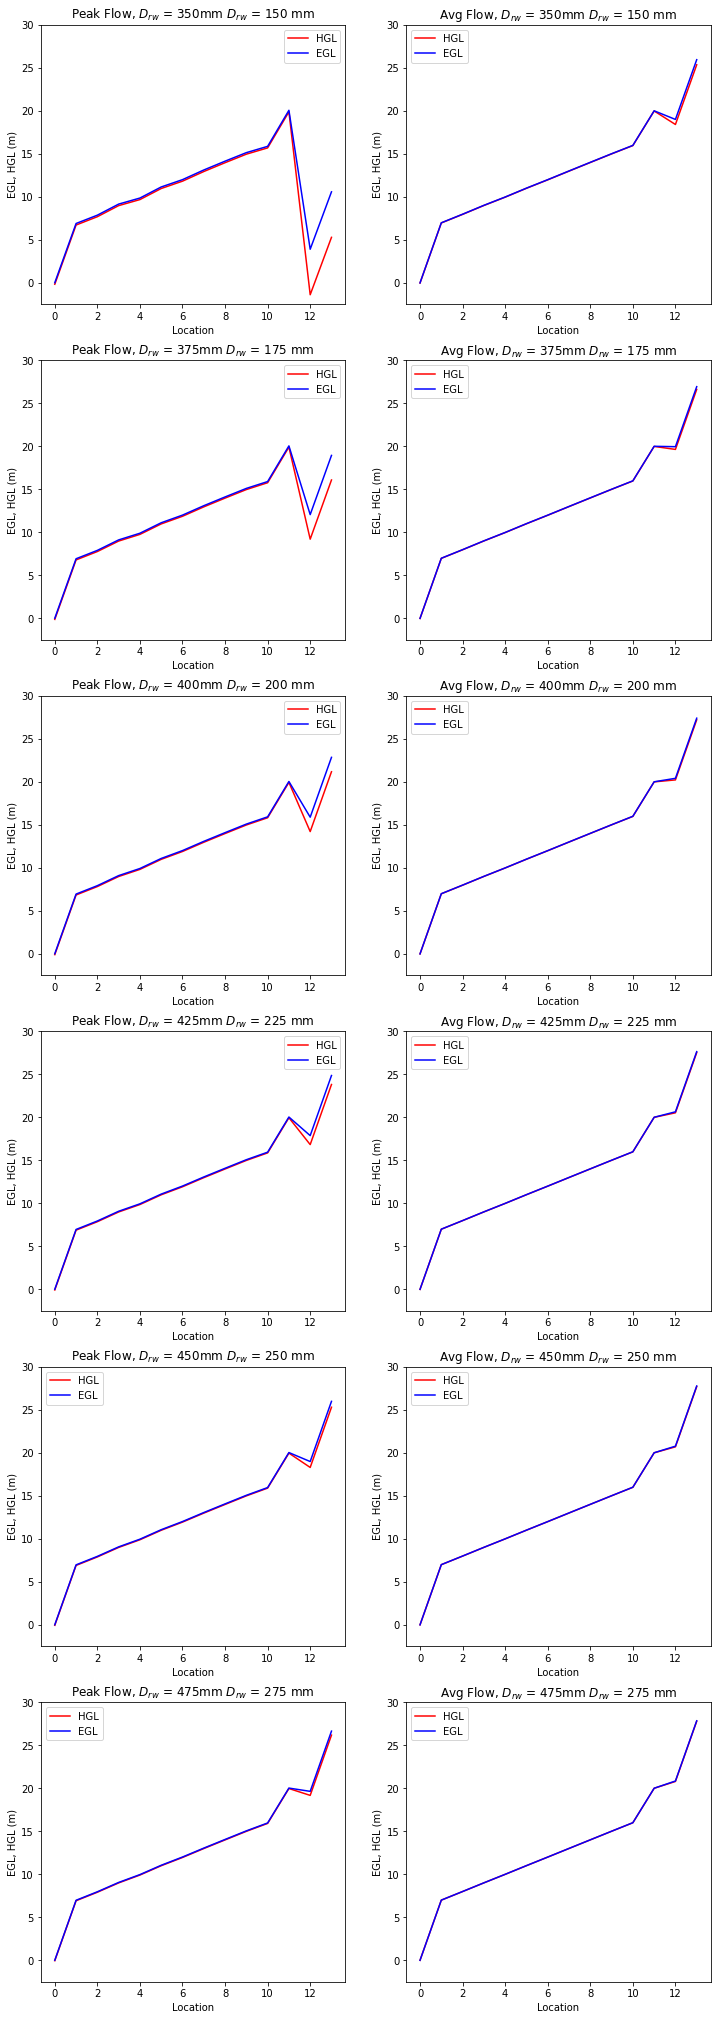

In [8]:
fig1, axs = plt.subplots(6, 2, figsize=(12,36))

for i in range(6):
    for j in range(2):

        if j: name = 'Avg'
        else: name = 'Peak'

        axs[i, j].plot(grade_lines[i][name+'_HGL'], 'r', label='HGL')
        axs[i, j].plot(grade_lines[i][name+'_EGL'], 'b', label='EGL')

        axs[i, j].set_ylim(-2.5, 30)

        axs[i, j].set_title(name + ' Flow, ' + r'$D_{rw}$ = ' + str(int(average['D_RW (m)'][i]*1000)) + r'mm $D_{rw}$ = ' + str(int(average['D_WTP (m)'][i]*1000)) + ' mm')
        axs[i, j].set_xlabel('Location')
        axs[i, j].set_ylabel('EGL, HGL (m)')

        axs[i, j].legend()

## Cost Calculations

### Pump Costs

In [9]:
# Since the maximum water hp is less than 200 (189.36 hp), the maximum amount of individual pumps needed is as follows
# 24 of pump A, 17 of pump B or 13 of pump C

power = np.zeros((25, 18, 14))

for i in np.arange(25):
    for j in np.arange(18):
        for k in np.arange(14):
            power[i, j, k] = 10*0.8*i + 15*0.76*j + 20*0.73*k

def pump_power_req(water_hp):
    '''
    Returns the set of all possible pump combinations that have and equal or grater power output as required.
    '''
    series = []

    for hp in water_hp:
        indices = set()

        i = 0
        j = 0
        k = 0
        while power[i, j, k] < hp and i < 24:
            while power[i, j, k] < hp and j < 17:
                while power[i, j, k] < hp and k < 13:
                    k += 1
                indices.add((i, j, k))
                k = 0
                j += 1
            indices.add((i, j, k))
            j = 0
            i += 1
        indices.add((i, j, k))
        
        indices = list(indices)
        indices.sort()
        series.append(indices)

    return np.array(series, dtype=object)

def pump_cost(peak_hp, avg_hp):
    
    # Find the possible combinations or pumps at peak and average conditions
    peak_indices = pump_power_req(peak_hp)
    avg_indices = pump_power_req(avg_hp)

  
    peak_indices_series = []
    avg_indices_series = []
    operational_costs_series = []
    capital_costs_series = []
    total_costs_series = []

    for i in range(len(average)):
        sub_avg_indices = []
        operational_costs = []
        capital_costs = []
        total_costs = []

        for peak_index in peak_indices[i]:

    #       generate a list of possible average pump combination, by shutting off one or more pumps from the peak conditions
            a, b, c = peak_index

            possible_indices = set()

            for j in range(a+1):
                for k in range(b+1):
                    for l in range(c+1):
                        possible_indices.add((j, k, l))

    #       intersect possible average and actual average indices

            indices = possible_indices.intersection(avg_indices[i])

            indices = list(indices)
            indices.sort()
    
    #       find the minimal operational cost of the resulting indices
            prices = []

            for index in indices:

                j, k, l = index

                break_hp = 10 * j + 15 * k + 20 * l
                prices.append( break_hp * 0.7457 * 24 * 365 * 0.0388)
            
            min_index = prices.index(min(prices))
            index = indices[min_index]
            sub_avg_indices.append(index)

            operational_cost = prices[min_index]
            operational_costs.append(operational_cost)

    #       capital cost of the peak index       
            capital_cost = 4000*a + 5500*b + 6500*c
            capital_costs.append(capital_cost)
    
    #       total cost for the peak index-avg index combination, including pipe cost
            total_cost = capital_cost + cost['Pipe Cost ($)'][i] + operational_cost
            total_costs.append(total_cost)

    #   Minimize cost
        min_index = total_costs.index(min(total_costs))

        peak_indices_series.append(peak_indices[i][min_index])
        avg_indices_series.append(sub_avg_indices[min_index])
        operational_costs_series.append(operational_costs[min_index])
        capital_costs_series.append(capital_costs[min_index])
        total_costs_series.append(total_costs[min_index])
    
    return(
        peak_indices_series,
        avg_indices_series,
        operational_costs_series,
        capital_costs_series,
        total_costs_series
    )

### Pipe Costs

In [10]:
cost['Pipe Cost ($)'] = 0

for i in range(len(pipeline)):
    
    if pipeline['Material'][i] == 'HDPE': cost_func = hdpe_cost
    else: cost_func = carbonsteel_cost
    
    cost['Pipe Cost ($)'] += cost_func(cost['D_{} (m)'.format(pipeline['Section'][i])], pipeline['Length (m)'][i])

cost['Pipe Cost ($)'] = np.round(cost['Pipe Cost ($)'], 2)

#### Capital Cost

The total number of pumps needed is dependent on the peak power requirements

#### Operational Cost

The operational cost is based on the average power requirements

In [11]:
peak_pumps, average_pumps, operational_cost, capital_cost, total_cost = pump_cost(peak['Water hp (hp)'], average['Water hp (hp)'])

cost['Num of A pumps at peak'], cost['Num of B pumps at peak'], cost['Num of C pumps at peak'] = np.array(peak_pumps).T
cost['Capital Cost ($)'] = np.round(np.array(capital_cost), 2)
cost['Num of A pumps at avg'], cost['Num of B pumps at avg'], cost['Num of C pumps at avg'] = np.array(average_pumps).T
cost['Yearly Operational Cost ($)'] = np.round(np.array(operational_cost), 2)
cost['Total Cost ($)'] = np.round(np.array(total_cost), 2)

In [12]:
peak[['D_RW (m)', 'D_WTP (m)', 'v_RW (m/s)', 'v_WTP (m/s)', 'Total h_L (m)', 'h_pump (m)', 'Water hp (hp)']]

,D_RW (m),D_WTP (m),v_RW (m/s),v_WTP (m/s),Total h_L (m),h_pump (m),Water hp (hp)
0,0.350,0.150,1.870883,10.185916,46.883763,79.995228,189.362124
1,0.375,0.175,1.629747,7.483530,25.053140,55.773088,132.024256
2,0.400,0.200,1.432394,5.729578,14.644205,44.213360,104.660440
3,0.425,0.225,1.268834,4.527074,9.160915,38.123754,90.245323
4,0.450,0.250,1.131768,3.666930,6.042593,34.662860,82.052804
5,0.475,0.275,1.015770,3.030521,4.158468,32.574118,77.108401
6,0.500,0.300,0.916732,2.546479,2.962791,31.250563,73.975325
7,0.525,0.325,0.831503,2.169781,2.172628,30.377415,71.908437
8,0.550,0.350,0.757630,1.870883,1.632396,29.781590,70.498021
9,0.575,0.375,0.693181,1.629747,1.252217,29.363140,69.507479


In [13]:
average[['D_RW (m)', 'D_WTP (m)', 'v_RW (m/s)', 'v_WTP (m/s)', 'Total h_L (m)', 'h_pump (m)', 'Water hp (hp)']]

,D_RW (m),D_WTP (m),v_RW (m/s),v_WTP (m/s),Total h_L (m),h_pump (m),Water hp (hp)
0,0.350,0.150,0.623628,3.395305,5.429645,33.997585,26.825996
1,0.375,0.175,0.543249,2.494510,2.892653,31.194870,24.614497
2,0.400,0.200,0.477465,1.909859,1.686509,29.860860,23.561888
3,0.425,0.225,0.422945,1.509025,1.052741,29.159723,23.008652
4,0.450,0.250,0.377256,1.222310,0.693116,28.762034,22.694853
5,0.475,0.275,0.338590,1.010174,0.476244,28.522428,22.505790
6,0.500,0.300,0.305577,0.848826,0.338848,28.370822,22.386165
7,0.525,0.325,0.277168,0.723260,0.248183,28.270937,22.307350
8,0.550,0.350,0.252543,0.623628,0.186277,28.202854,22.253629
9,0.575,0.375,0.231060,0.543249,0.142761,28.155086,22.215937


In [14]:
cost

,D_RW (m),D_WTP (m),Pipe Cost ($),Num of A pumps at peak,Num of B pumps at peak,Num of C pumps at peak,Capital Cost ($),Num of A pumps at avg,Num of B pumps at avg,Num of C pumps at avg,Yearly Operational Cost ($),Total Cost ($)
0,0.350,0.150,1270.50,0,0,13,84500,0,0,2,10138.18,95908.68
1,0.375,0.175,1488.02,1,2,7,60500,0,1,1,8870.91,70858.93
2,0.400,0.200,1724.80,4,0,5,48500,3,0,0,7603.63,57828.43
3,0.425,0.225,1980.82,4,0,4,42000,3,0,0,7603.63,51584.45
4,0.450,0.250,2256.10,3,0,4,38000,3,0,0,7603.63,47859.73
5,0.475,0.275,2550.62,1,1,4,35500,1,0,1,7603.63,45654.25
6,0.500,0.300,2864.40,2,0,4,34000,1,0,1,7603.63,44468.03
7,0.525,0.325,3197.42,2,0,4,34000,1,0,1,7603.63,44801.05
8,0.550,0.350,3549.70,2,1,3,33000,1,0,1,7603.63,44153.33
9,0.575,0.375,3921.22,0,1,4,31500,0,1,1,8870.91,44292.13


<AxesSubplot:>

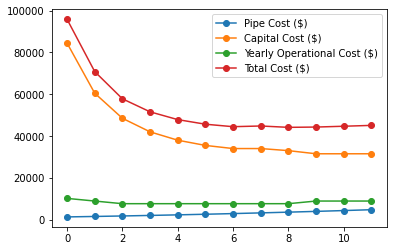

In [15]:
cost[['Pipe Cost ($)', 'Capital Cost ($)', 'Yearly Operational Cost ($)', 'Total Cost ($)']].plot(**dict(marker='o'))

In [16]:
cost[cost['Total Cost ($)']==cost['Total Cost ($)'].min()]

,D_RW (m),D_WTP (m),Pipe Cost ($),Num of A pumps at peak,Num of B pumps at peak,Num of C pumps at peak,Capital Cost ($),Num of A pumps at avg,Num of B pumps at avg,Num of C pumps at avg,Yearly Operational Cost ($),Total Cost ($)
8,0.55,0.35,3549.7,2,1,3,33000,1,0,1,7603.63,44153.33
